In [83]:
import pandas as pd
import numpy as np
emicron_original = pd.read_csv("../../../Data/emicron_geih_merged.csv")  # Include the subdirectory in the file path

In [84]:
emicron = emicron_original.copy()

**filter only colombians**

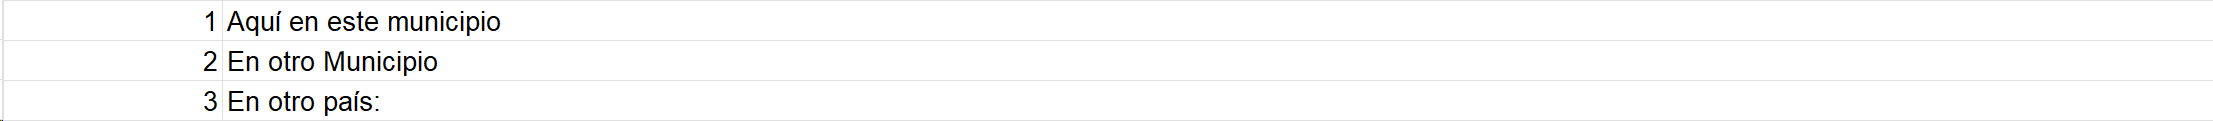

In [85]:
emicron_nat = emicron[(emicron['P3373'] == 1) | (emicron['P3373'] == 2)]
emicron_nat = emicron_nat[(emicron_nat['P3374'] == 1) | (emicron['P3374'] == 2)]

C:\Users\angel\AppData\Local\Temp\ipykernel_9000\1471724531.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emicron_nat = emicron_nat[(emicron_nat['P3374'] == 1) | (emicron['P3374'] == 2)]


**Integrating MPI**

In [86]:
mpi = pd.read_stata("../../../Outputs/emicron-informality-mpi.dta")

In [87]:
mpi.filter(like='mpi').columns

Index(['mpi_index', 'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
       'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
       'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
       'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
       'mpi_health_ss', 'mpi_deprivations'],
      dtype='object')

In [88]:
#merge with mpi to get mpi_index
columns_to_merge = ['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'mpi_index',
                    'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
                    'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
                    'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
                    'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
                    'mpi_health_ss']

emicron_nat = pd.merge(emicron, mpi[columns_to_merge], on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P"], how='left')

**analysis natives**

*formality index*

In [89]:
weighted_avg = (emicron_nat['II'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II in emicron_nat:", weighted_avg)

Weighted average of II in emicron_nat: 0.6380701439547041


Dimension 1 - Registration (RUT and Cam. Comercio), no Nan to handle

Dimension 2 - Healthcare and Pensions (H, P and ARL for owner and workers, if any)

Dimension 3 - Taxes (Renta, IVA, ICA. If eligible, i.e., RUT != Simplificado)

Dimension 4 - Accounting (Formal), no Nan to handle

*II_Dx*

In [90]:
weighted_avg = (emicron_nat['II_D1'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D1 in emicron_nat:", weighted_avg)

Weighted average of II_D1 in emicron_nat: 0.17225927552425177


In [91]:
weighted_avg = (emicron_nat['II_D2'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D2 in emicron_nat:", weighted_avg)

Weighted average of II_D2 in emicron_nat: 0.06639273176196285


In [92]:
weighted_avg = (emicron_nat['II_D3'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D3 in emicron_nat:", weighted_avg)

Weighted average of II_D3 in emicron_nat: 0.19766631011366978


In [93]:
weighted_avg = (emicron_nat['II_D4'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D4 in emicron_nat:", weighted_avg)

Weighted average of II_D4 in emicron_nat: 0.20175182655481982


*3069: how many employees*
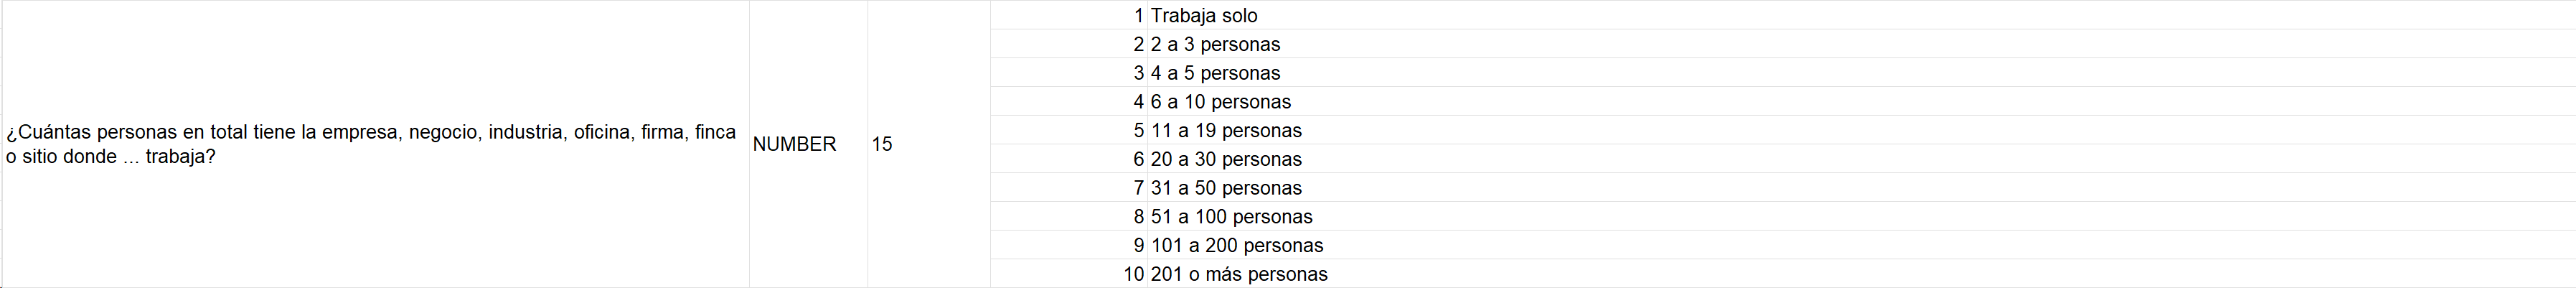

In [94]:
weighted_avg = (emicron_nat['P3069'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3069 in emicron_nat:", weighted_avg)

Weighted average of P3069 in emicron_nat: 1.3725486325557494


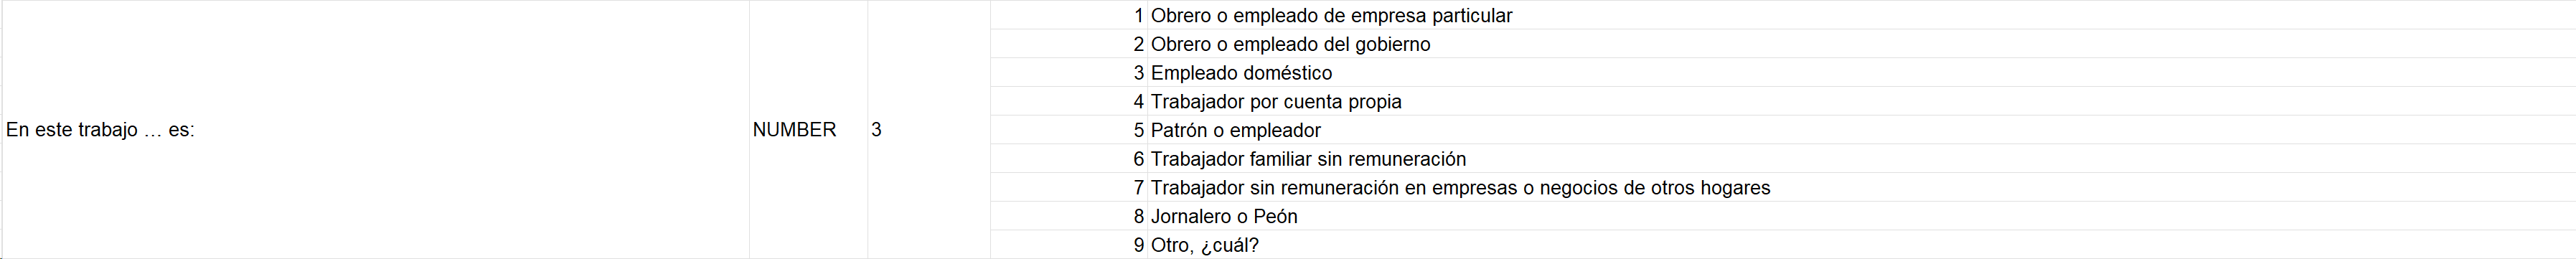

In [95]:
weighted_avg = (emicron_nat['P6430'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P6430 in emicron_nat:", weighted_avg)

Weighted average of P6430 in emicron_nat: 4.067501056584028


*7040:*
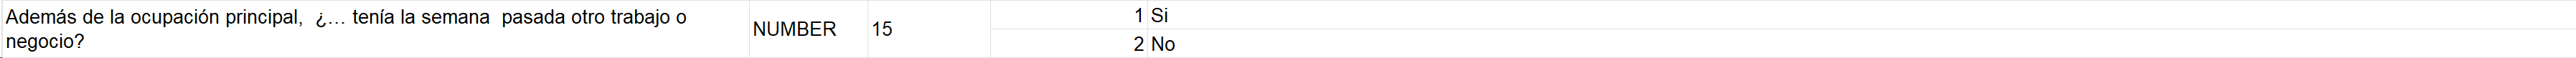

In [96]:
weighted_avg = (emicron_nat['P7040'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P7040 in emicron_nat:", weighted_avg)

Weighted average of P7040 in emicron_nat: 1.906259010307658


*6440: 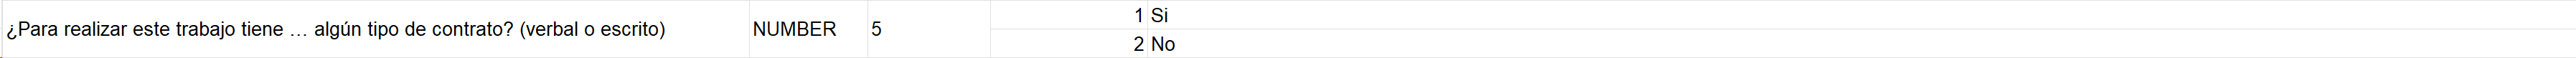*

In [97]:
weighted_avg = (emicron_nat['P6440'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P6440 in emicron_nat:", weighted_avg)

Weighted average of P6440 in emicron_nat: 1.9578417376072055


*monthly compensation of all workers*

In [98]:
weighted_avg = (emicron_nat['REMUNERACION_TOTAL'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of REMUNERACION_TOTAL in emicron_nat:", weighted_avg)

Weighted average of REMUNERACION_TOTAL in emicron_nat: 247132.7581705719


*registered in Chamber of Commerce?*

In [99]:
weighted_avg = (emicron_nat['P1055'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P1055 in emicron_nat:", weighted_avg)

Weighted average of P1055 in emicron_nat: 1.8864403086182817


*Sales last month*

In [100]:
weighted_avg = (emicron_nat['VENTAS_MES_ANTERIOR'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of VENTAS_MES_ANTERIOR in emicron_nat:", weighted_avg)

Weighted average of VENTAS_MES_ANTERIOR in emicron_nat: 2612427.23056962


*P3017_B: costs of electricity*

In [101]:
weighted_avg = (emicron_nat['P3017_B'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3017_B in emicron_nat:", weighted_avg)

Weighted average of P3017_B in emicron_nat: 31595.085393776437


*P3017_G: costs of transport*

In [102]:
weighted_avg = (emicron_nat['P3017_G'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3017_G in emicron_nat:", weighted_avg)

Weighted average of P3017_G in emicron_nat: 57597.00519201451


*P3010: if the business is part of Veeduria ciudadana*

In [103]:
weighted_avg = (emicron_nat['P3010'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3010 in emicron_nat:", weighted_avg)

Weighted average of P3010 in emicron_nat: 1.9998505132724116


*P3012: if the business is part of an environmental group*

In [104]:
weighted_avg = (emicron_nat['P3012'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3012 in emicron_nat:", weighted_avg)

Weighted average of P3012 in emicron_nat: 1.9996878463349606


*Registered at RUT*

In [105]:
weighted_avg = (emicron_nat['P1633'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P1633 in emicron_nat:", weighted_avg)

Weighted average of P1633 in emicron_nat: 1.7690411403332147


*What financial register is used. val 3 and 5 would be informal*

In [106]:
weighted_avg = (emicron_nat['P640'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P640 in emicron_nat:", weighted_avg)

Weighted average of P640 in emicron_nat: 4.229778744557207


*how many people work in the business*

In [107]:
weighted_avg = (emicron_nat['P3091'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3091 in emicron_nat:", weighted_avg)

Weighted average of P3091 in emicron_nat: 1.3533970540257192


*whether you are a business owner (1) or a freelancer (2)*

In [108]:
weighted_avg = (emicron_nat['P3033'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3033 in emicron_nat:", weighted_avg)

Weighted average of P3033 in emicron_nat: 1.8798340923704866


*average monthly consumption*

In [109]:
weighted_avg = (emicron_nat['CONSUMO_INTERMEDIO'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of CONSUMO_INTERMEDIO in emicron_nat:", weighted_avg)

Weighted average of CONSUMO_INTERMEDIO in emicron_nat: 1652966.2096113681


*does the business have a commercial name? 1 yes 2 no*

In [110]:
weighted_avg = (emicron_nat['P3035'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3035 in emicron_nat:", weighted_avg)

Weighted average of P3035 in emicron_nat: 1.829490734397012


*social benefits paid per month*

In [111]:
weighted_avg = (emicron_nat['PRESTACIONES'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of PRESTACIONES in emicron_nat:", weighted_avg)

Weighted average of PRESTACIONES in emicron_nat: 63683.34312990808


*if anyone helps in the business*

In [112]:
weighted_avg = (emicron_nat['P3031'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3031 in emicron_nat:", weighted_avg)

Weighted average of P3031 in emicron_nat: 1.7811241739629096


*does the business use technological devices?*

In [113]:
weighted_avg = (emicron_nat['P4001'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P4001 in emicron_nat:", weighted_avg)

Weighted average of P4001 in emicron_nat: 1.8908020249813215


*COSTOS_MES_ANTERIOR*

In [114]:
weighted_avg = (emicron_nat['COSTOS_MES_ANTERIOR'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of COSTOS_MES_ANTERIOR in emicron_nat:", weighted_avg)

Weighted average of COSTOS_MES_ANTERIOR in emicron_nat: 1278840.341074591


*have paid ARL?*

In [115]:
weighted_avg = (emicron_nat['P3090'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3090 in emicron_nat:", weighted_avg)

Weighted average of P3090 in emicron_nat: 1.937731900248632


*does the business have internet?*

In [116]:
weighted_avg = (emicron_nat['P2524'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P2524 in emicron_nat:", weighted_avg)

Weighted average of P2524 in emicron_nat: 1.5945641937619595


*average monthly sales*

In [117]:
weighted_avg = (emicron_nat['P3072'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3072 in emicron_nat:", weighted_avg)

Weighted average of P3072 in emicron_nat: 817752.5474114062


*average monthly costs*

In [118]:
weighted_avg = (emicron_nat['GASTOS_MES'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of GASTOS_MES in emicron_nat:", weighted_avg)

Weighted average of GASTOS_MES in emicron_nat: 372039.94518793595


*do you have email?*

In [119]:
weighted_avg = (emicron_nat['P3000'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3000 in emicron_nat:", weighted_avg)

Weighted average of P3000 in emicron_nat: 1.8941653152091795


*social network?*

In [120]:
weighted_avg = (emicron_nat['P1559'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P1559 in emicron_nat:", weighted_avg)

Weighted average of P1559 in emicron_nat: 1.8896955804348117


*do you have a telephone*

In [121]:
weighted_avg = (emicron_nat['P976'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P976 in emicron_nat:", weighted_avg)

Weighted average of P976 in emicron_nat: 1.3439717473130557


*do you pay SENA or ICBF*

In [122]:
weighted_avg = (emicron_nat['P2989'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P2989 in emicron_nat:", weighted_avg)

Weighted average of P2989 in emicron_nat: 1.9769114543347555


*did you pay healthcare or pension last month?*

In [123]:
weighted_avg = (emicron_nat['P3088'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3088 in emicron_nat:", weighted_avg)

Weighted average of P3088 in emicron_nat: 1.9522385933946562


*added value monthly*

In [124]:
weighted_avg = (emicron_nat['VALOR_AGREGADO'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of VALOR_AGREGADO in emicron_nat:", weighted_avg)

Weighted average of VALOR_AGREGADO in emicron_nat: 959461.0209582519


*which industrial category? 12*
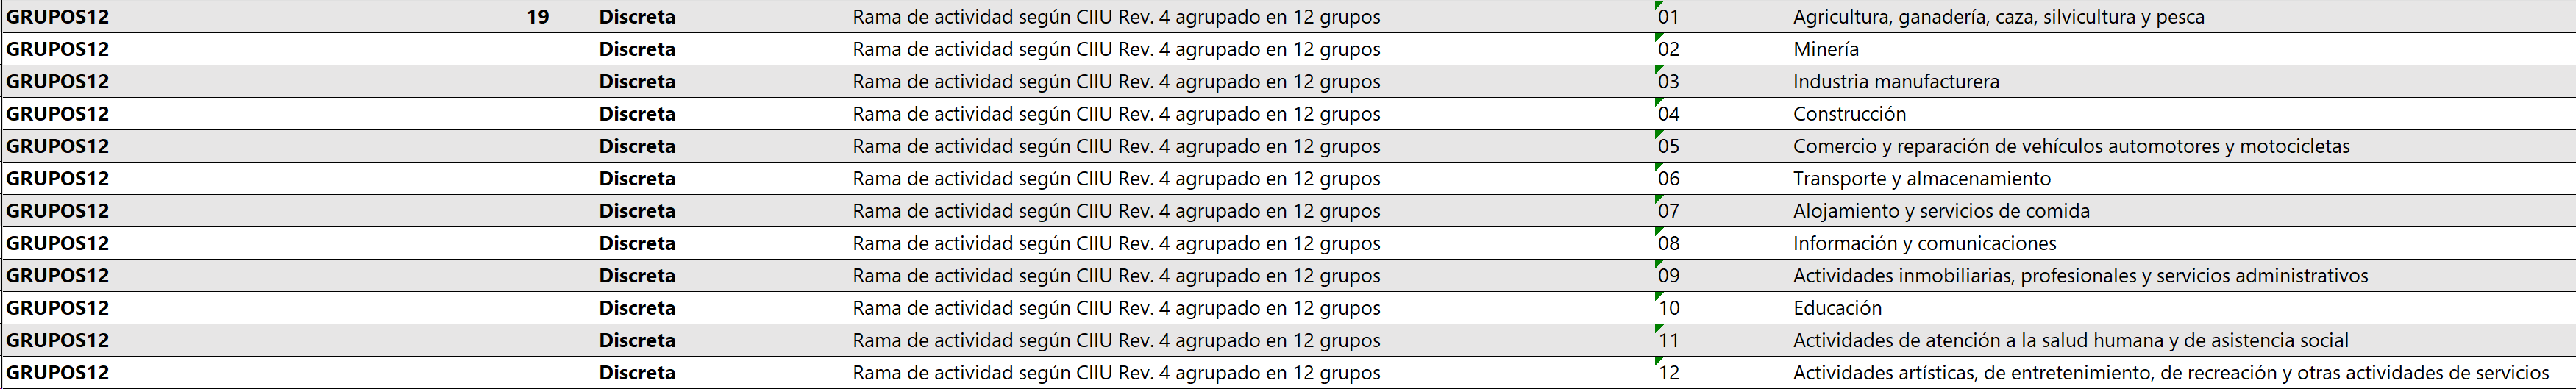

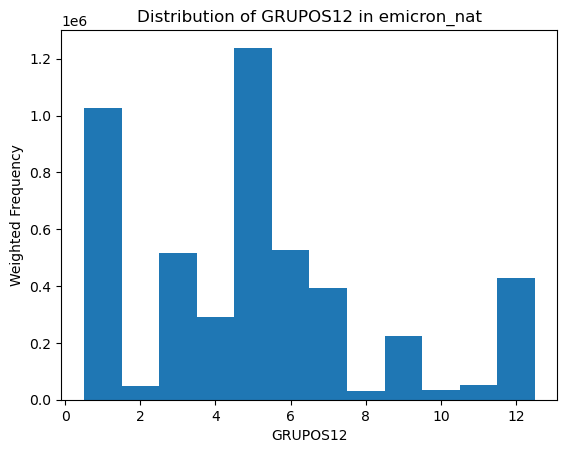

In [125]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['GRUPOS12'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('GRUPOS12')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of GRUPOS12 in emicron_nat')

# Show the plot
plt.show()

*which industrial category? 4*
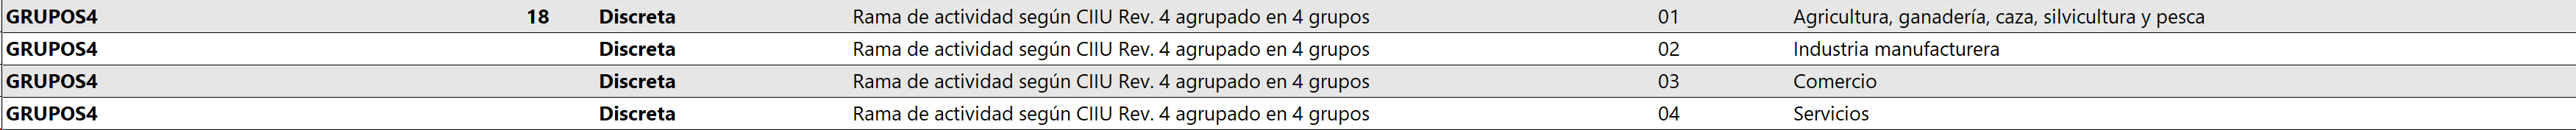

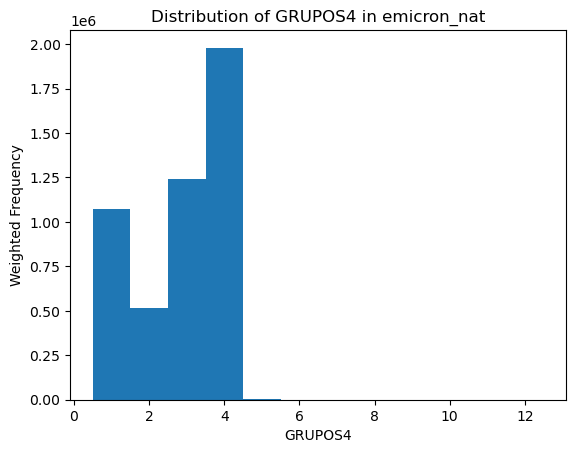

In [126]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['GRUPOS4'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('GRUPOS4')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of GRUPOS4 in emicron_nat')

# Show the plot
plt.show()

*Municipal Head Offices*

*Populated Centres and Dispersed Rural Areas*

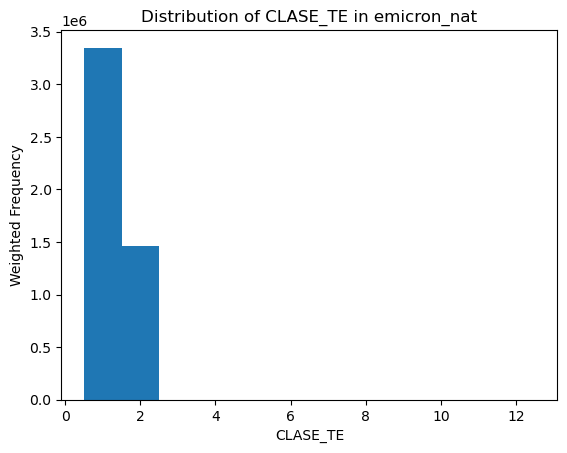

In [127]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['CLASE_TE'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('CLASE_TE')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of CLASE_TE in emicron_nat')

# Show the plot
plt.show()

*P3373: where born*
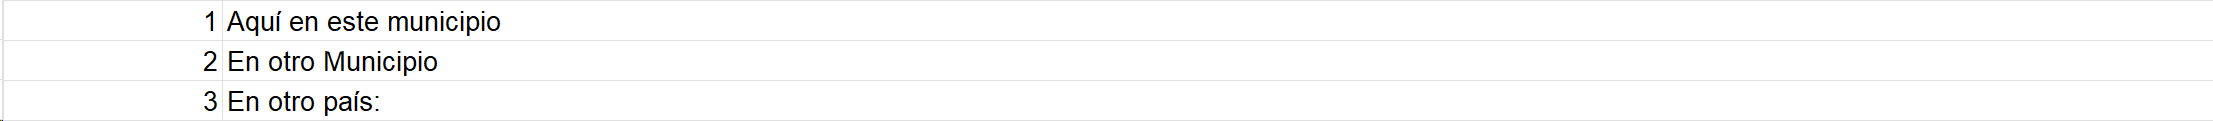

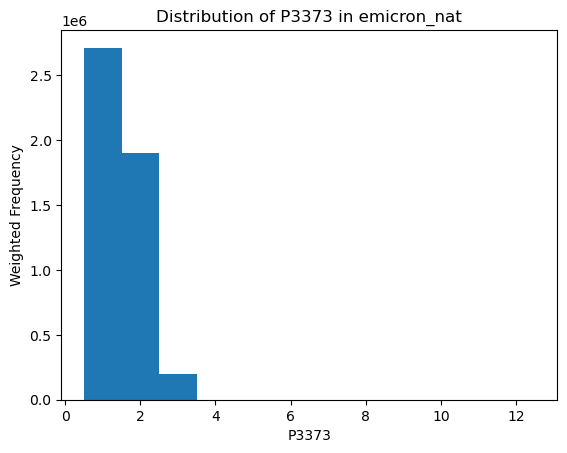

In [128]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['P3373'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3373')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3373 in emicron_nat')

# Show the plot
plt.show()

*urban: if 1 they are in city, if 0 rural area*

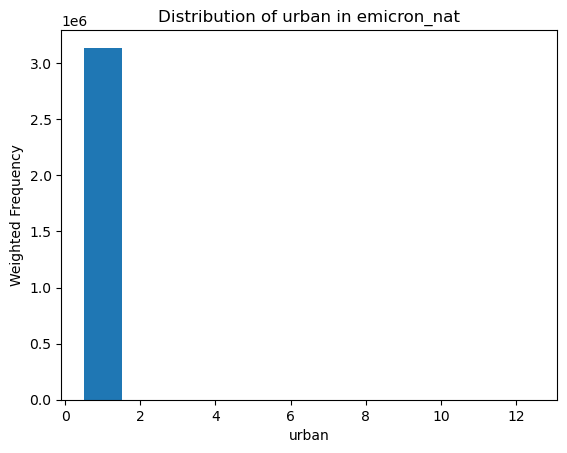

In [129]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['urban'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('urban')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of urban in emicron_nat')

# Show the plot
plt.show()

*P3374: nationality*
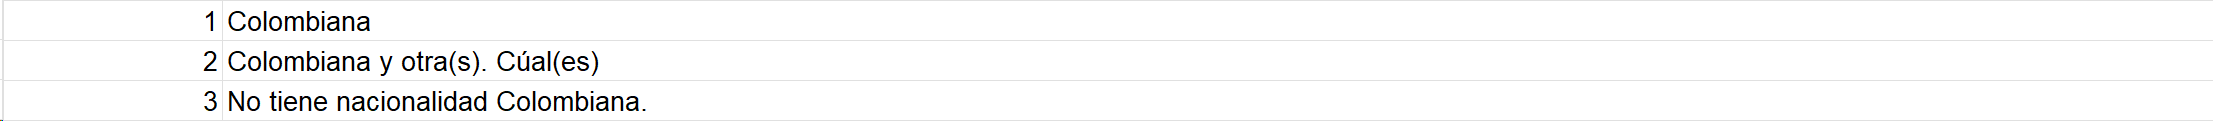

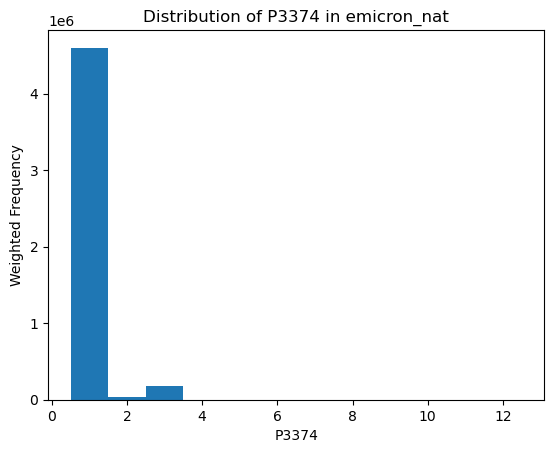

In [130]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['P3374'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3374')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3374 in emicron_nat')

# Show the plot
plt.show()

*establishment of business (physical location)*

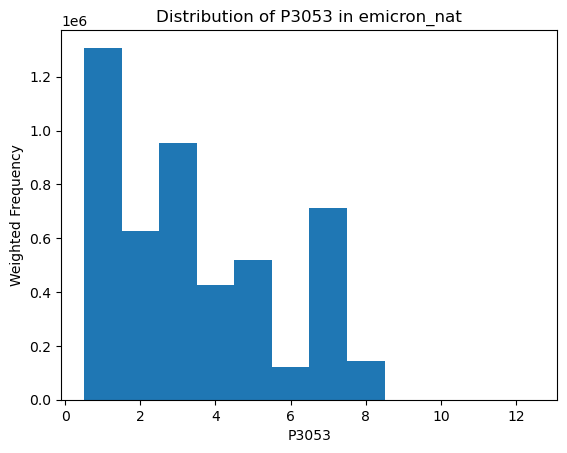

In [131]:
# Plot the distribution
plt.hist(emicron_nat['P3053'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3053')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3053 in emicron_nat')

# Show the plot
plt.show()

*how many months have you been working in this establishment?*

In [132]:
weighted_avg = (emicron_nat['P3034'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3034 in emicron_nat:", weighted_avg)

Weighted average of P3034 in emicron_nat: 141.49645094549726


*How much time has this business working?*

In [133]:
weighted_avg = (emicron_nat['P639'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P639 in emicron_nat:", weighted_avg)

Weighted average of P639 in emicron_nat: 3.7696755960194754


*age of the owner*

In [134]:
weighted_avg = (emicron_nat['P241'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P241 in emicron_nat:", weighted_avg)

Weighted average of P241 in emicron_nat: 45.65883111202651


*geographical location*
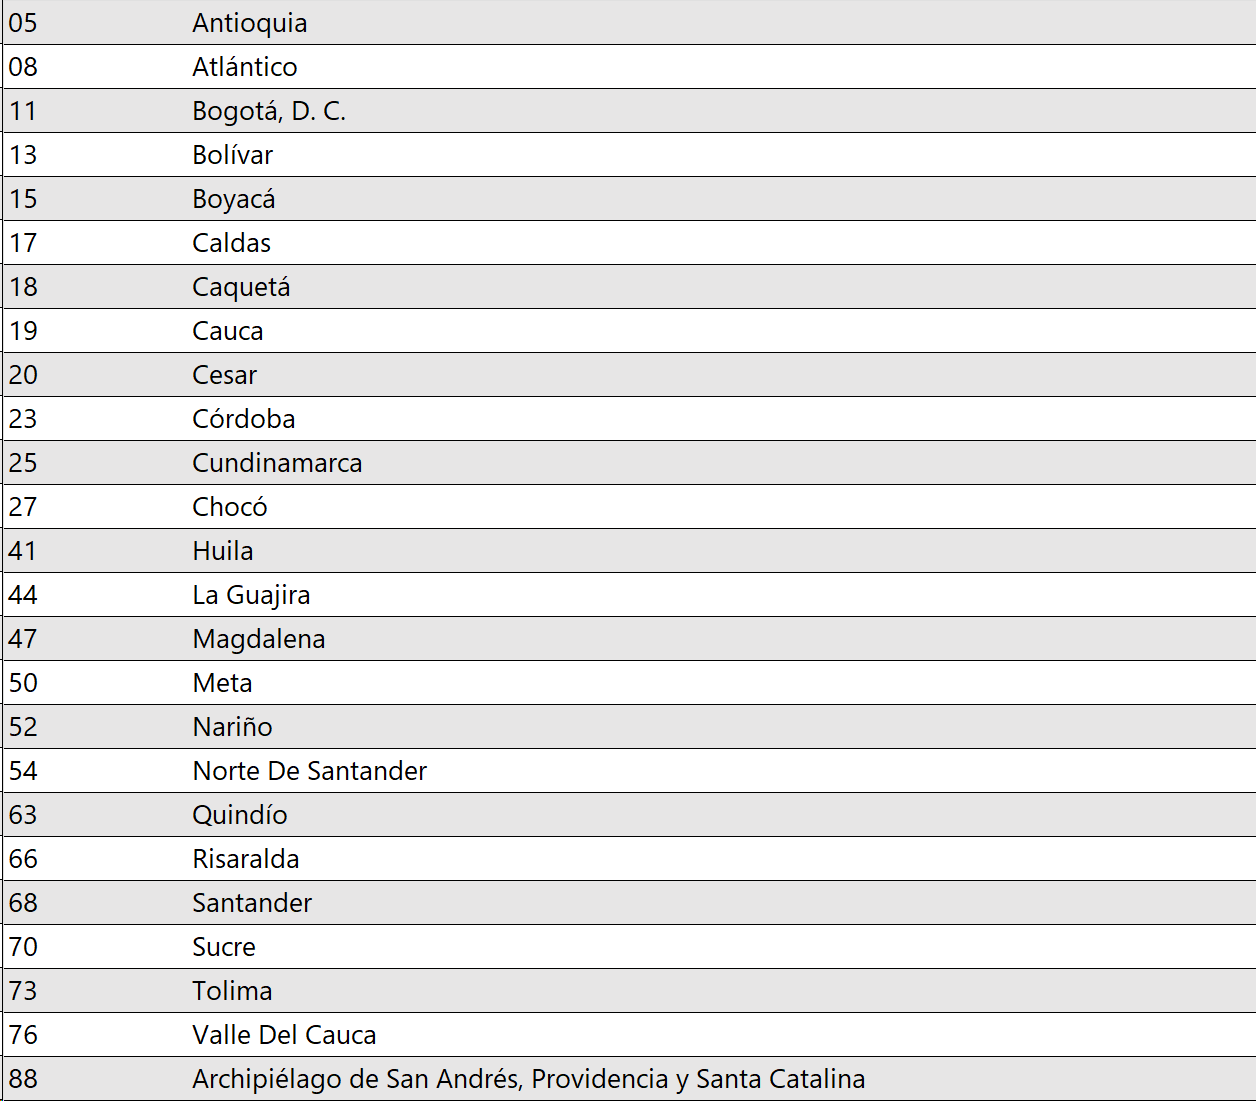

In [135]:
weighted_freq = emicron_nat.groupby('COD_DEPTO')['F_EXP'].sum().sort_values(ascending=False)
print(weighted_freq)

COD_DEPTO
5     606519.952740
11    436285.960121
76    426906.555394
52    391070.863307
8     352469.546989
13    332733.825690
23    260984.831415
68    232933.847531
47    203036.585378
70    175675.145819
25    167839.918265
19    158990.685137
44    145918.844977
15    130819.997367
54    124067.995919
20    121890.938716
73    112635.377093
41     95770.886510
50     81495.899227
17     76746.600435
66     67138.098610
18     41181.676562
63     36637.193350
27     29756.049352
88      2370.675216
Name: F_EXP, dtype: float64


*P3051*
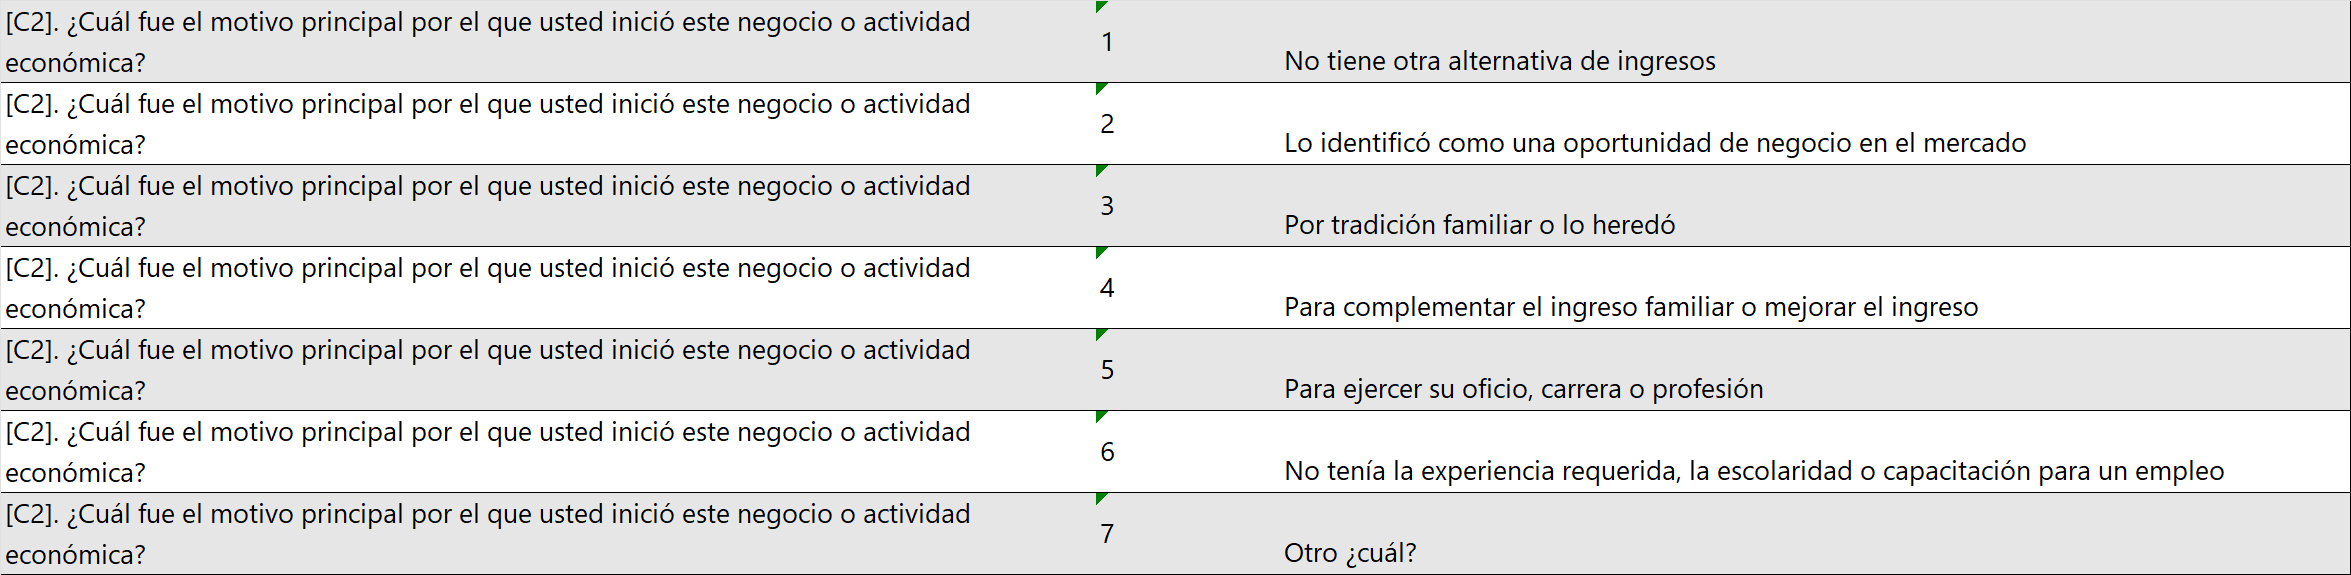

In [136]:
emicron_nat['bad_reason_create_business'] = emicron_nat['P3051'].apply(lambda x: 1 if x in [1, 6] else 0)

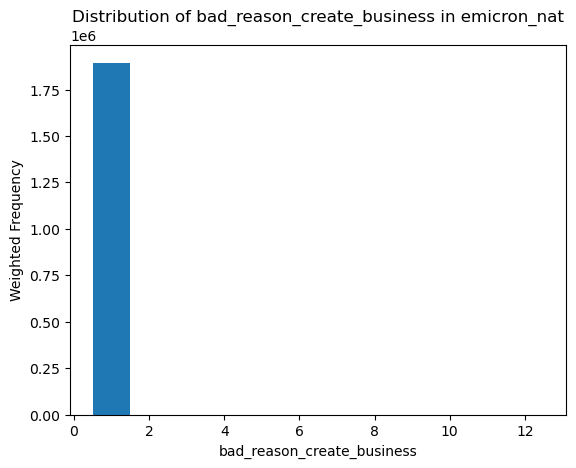

In [137]:
# Plot the distribution
plt.hist(emicron_nat['bad_reason_create_business'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('bad_reason_create_business')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of bad_reason_create_business in emicron_nat')

# Show the plot
plt.show()

*P3052*
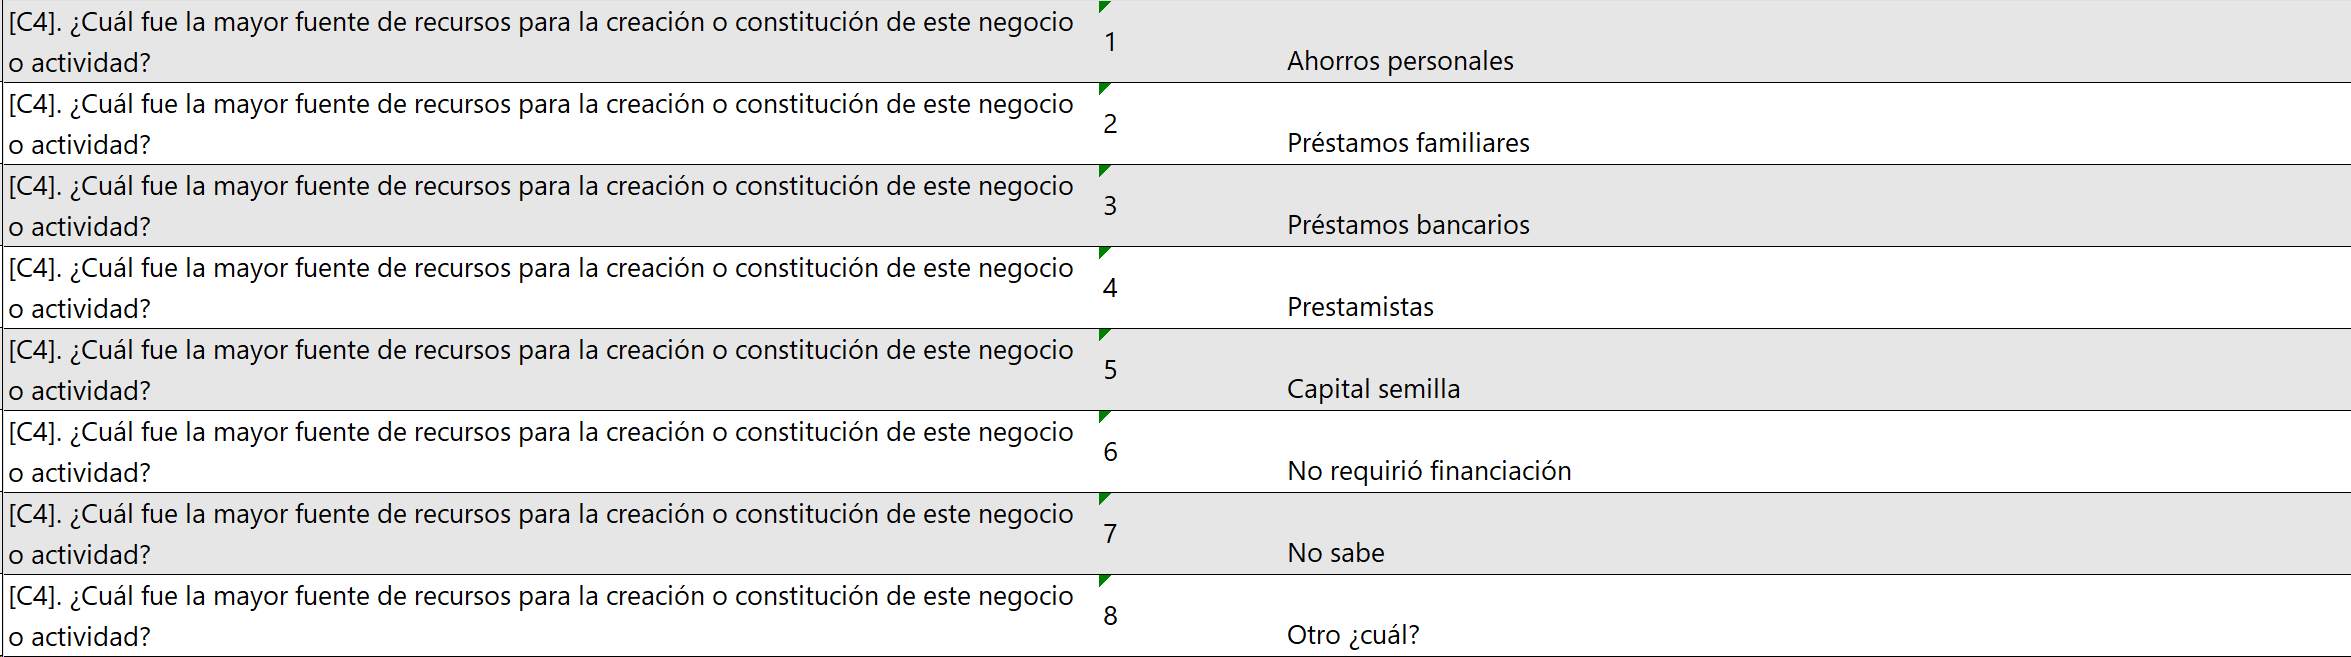

In [138]:
emicron_nan = {}

In [139]:
modulo_emprendimiento = pd.read_csv("../../../Data/Emicron-2022/Módulo de emprendimiento.csv")

In [140]:
emicron_nan = pd.merge(emicron_nat, modulo_emprendimiento, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [141]:
emicron_nan['finance'] = emicron_nan['P3052'].isin([1, 2, 6, 7, 8]).astype(int)

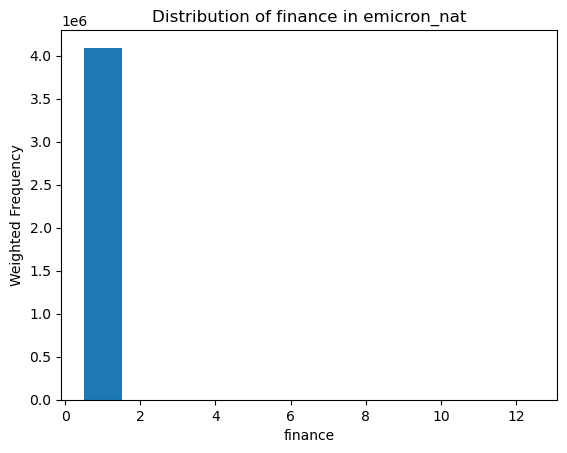

In [143]:
# Plot the distribution
plt.hist(emicron_nan['finance'], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('finance')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of finance in emicron_nat')

# Show the plot
plt.show()

*P994*

They don't need them
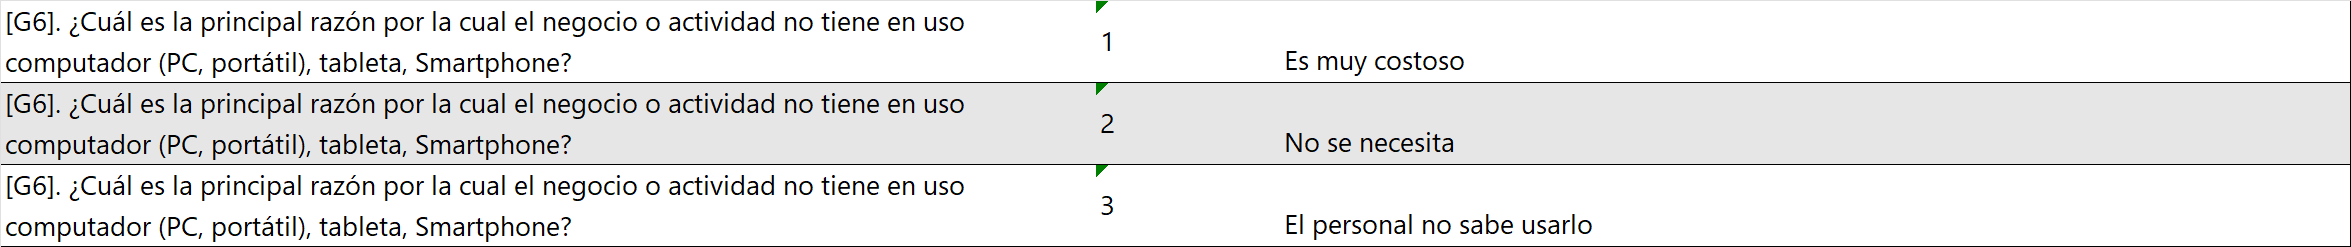

In [144]:
emicron_nan = {}

In [145]:
modulo_TIC = pd.read_csv("../../../Data/Emicron-2022/Módulo de TIC.csv")

In [147]:
emicron_nan = pd.merge(emicron_nat, modulo_TIC, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [148]:
emicron_nan['why_not_tech'] = emicron_nan['P994'].isin([2]).astype(int)

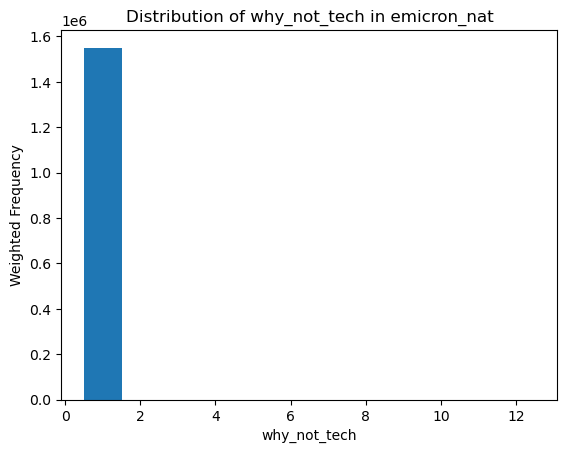

In [149]:
# Plot the distribution
plt.hist(emicron_nan['why_not_tech'], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('why_not_tech')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of why_not_tech in emicron_nat')

# Show the plot
plt.show()

*P1093: do you use internet?*

In [150]:
emicron_nan = {}

In [151]:
emicron_nan = pd.merge(emicron_nat, modulo_TIC, on=['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'CLASE_TE', 'COD_DEPTO', 'F_EXP'], how='inner')

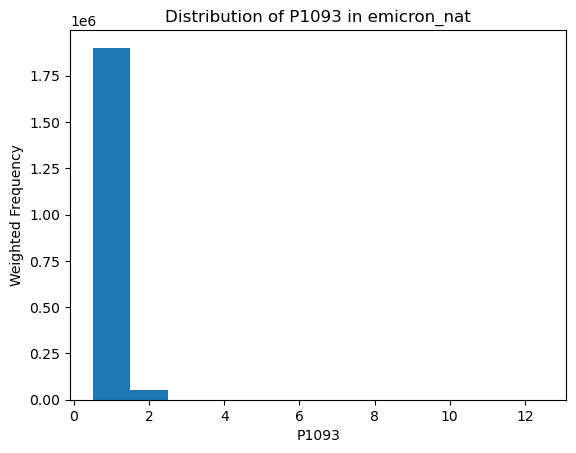

In [152]:
# Plot the distribution
plt.hist(emicron_nan['P1093'], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P1093')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P1093 in emicron_nat')

# Show the plot
plt.show()

*P3042 edu level*
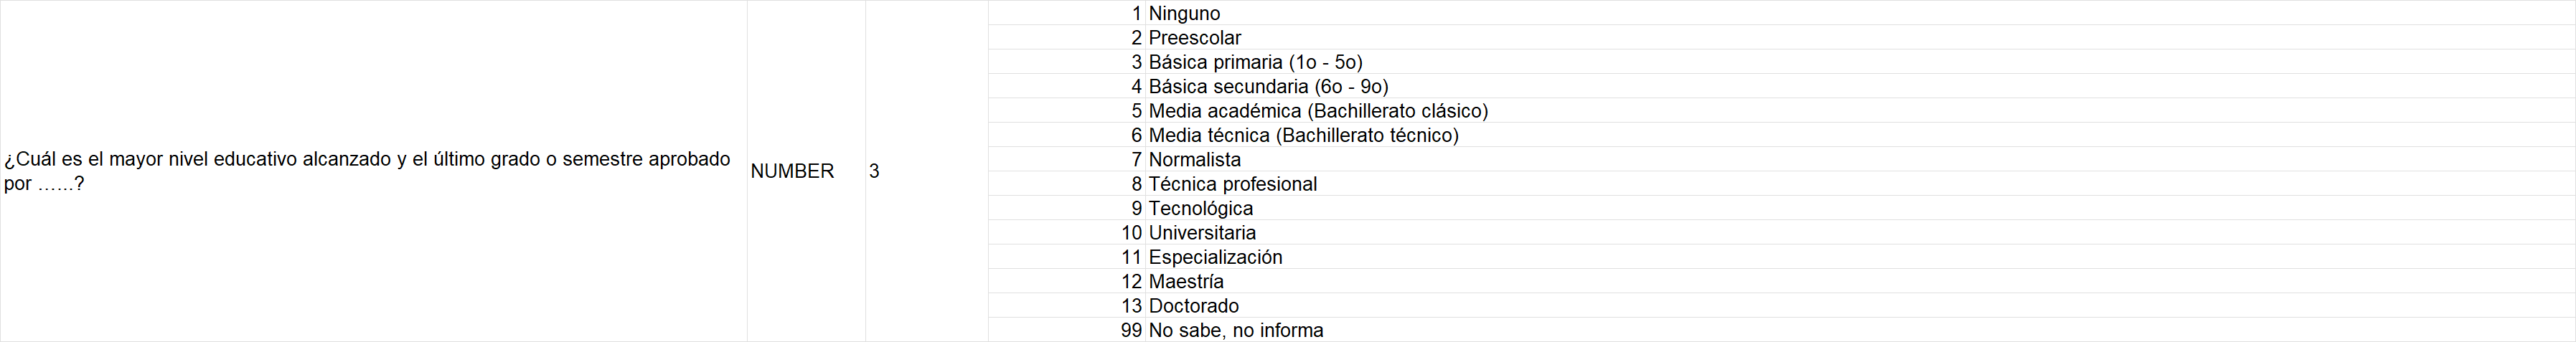

In [153]:
emicron_nan = {}

In [154]:
modulo_individual_geih = pd.read_stata("../../../Outputs/02_household-surveys/individual_geih-2022-clean.dta")

C:\Users\angel\AppData\Local\Temp\ipykernel_9000\1927362092.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  modulo_individual_geih = pd.read_stata("../../../Outputs/02_household-surveys/individual_geih-2022-clean.dta")


In [155]:
# Define the old and new column names
rename_cols = {'MES': 'MES_REF', 'CLASE': 'CLASE_TE', 'DPTO': 'COD_DEPTO', 'ORDEN':'SECUENCIA_ENCUESTA'}

# Rename the columns in all dataframes
modulo_individual_geih = modulo_individual_geih.rename(columns=rename_cols)

In [156]:
columns_to_drop = ['PERIODO', 'PER', 'REGIS', 'CLASE_TE', 'COD_DEPTO', 'MES_REF', 'id_house', 'FEX_C18', 'HOGAR', 'adj_weight', 'P3091', 'P3089', 'P3095', 'P3096', 'P3098', 'P3099', 'P3093']

modulo_individual_geih = modulo_individual_geih.drop(columns_to_drop, axis=1, errors='ignore')

In [157]:
modulo_individual_geih["DIRECTORIO"] = modulo_individual_geih["DIRECTORIO"].astype('int64')
modulo_individual_geih["SECUENCIA_P"] = modulo_individual_geih["SECUENCIA_P"].astype('int64')
modulo_individual_geih["SECUENCIA_ENCUESTA"] = modulo_individual_geih["SECUENCIA_ENCUESTA"].astype('int64')

In [158]:
# Define the columns you want to merge
merge_cols = ["DIRECTORIO", "SECUENCIA_P", 'SECUENCIA_ENCUESTA']

# Merge the first dataset
emicron_merge = pd.merge(emicron_nat, modulo_individual_geih, on=merge_cols, how='inner')

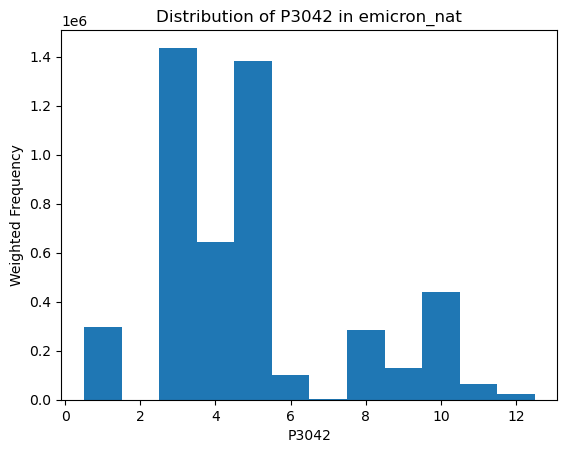

In [159]:
# Plot the distribution
plt.hist(emicron_merge['P3042'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3042')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3042 in emicron_nat')

# Show the plot
plt.show()

In [160]:
emicron_merge['edu_level_high_school'] = ((emicron_merge['P3042'].ge(5)) & (emicron_merge['P3042'] != 99)).astype(int)

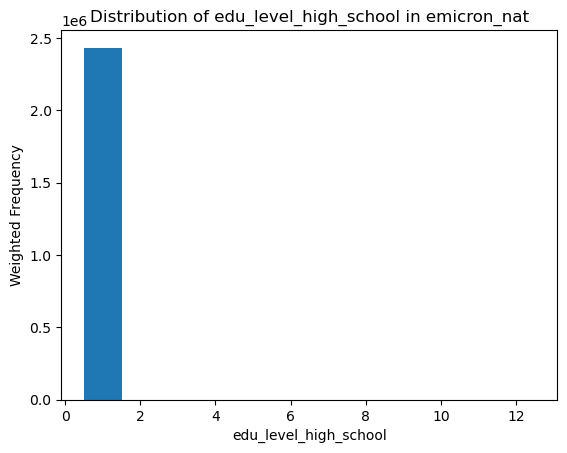

In [161]:
# Plot the distribution
plt.hist(emicron_merge['edu_level_high_school'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('edu_level_high_school')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of edu_level_high_school in emicron_nat')

# Show the plot
plt.show()

*P3043: edu degree*
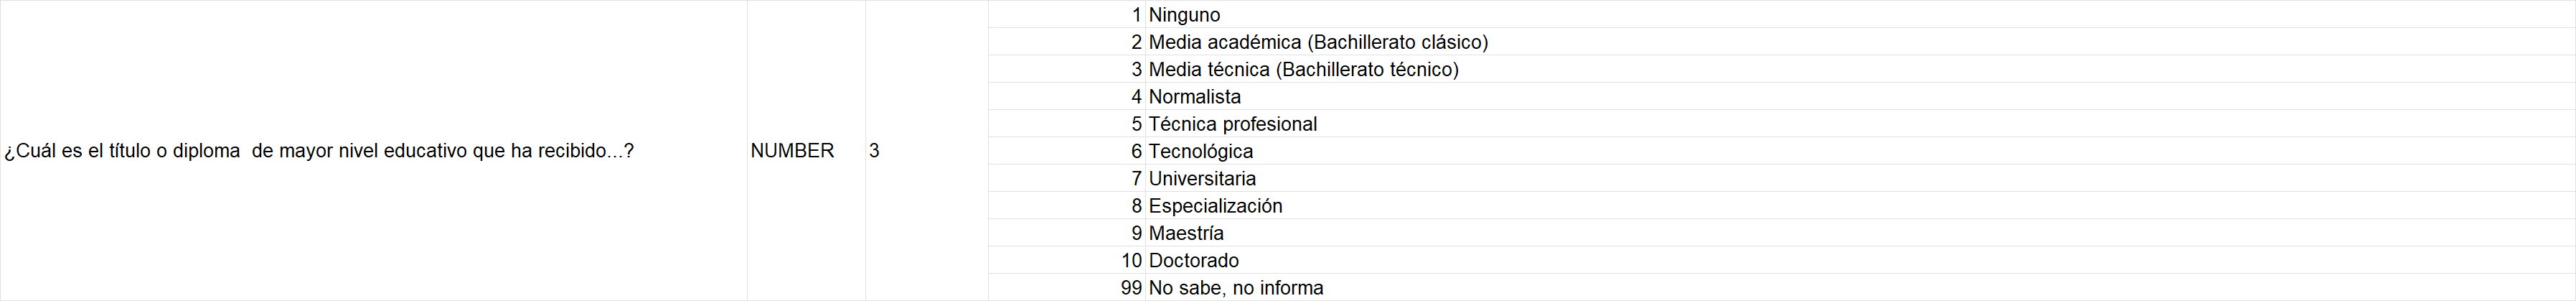

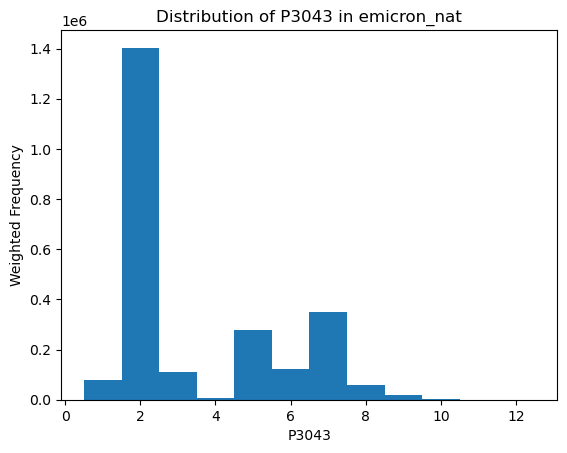

In [162]:
# Plot the distribution
plt.hist(emicron_merge['P3043'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3043')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3043 in emicron_nat')

# Show the plot
plt.show()

*P3039: gender*
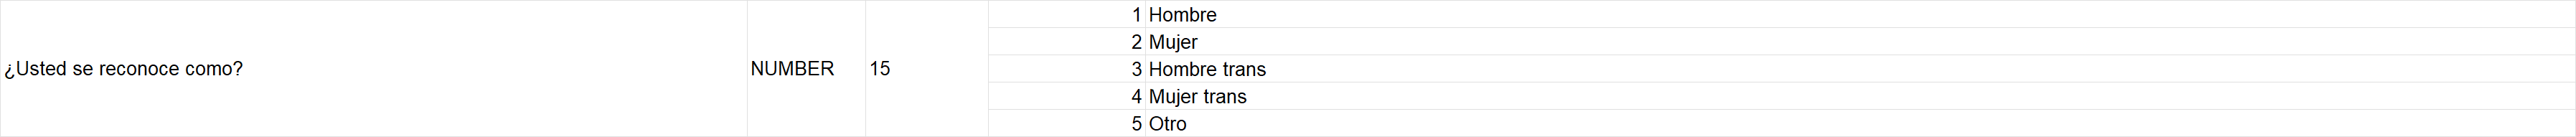

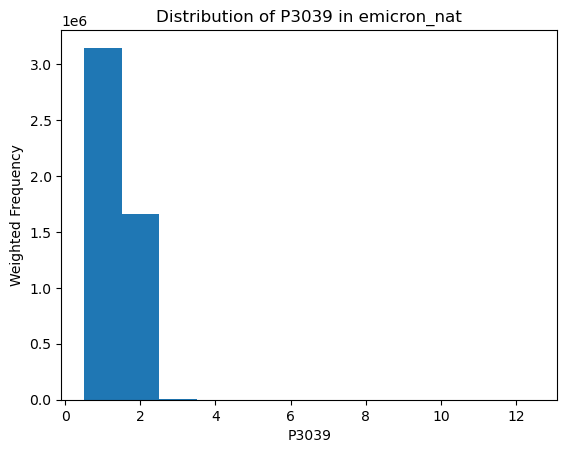

In [163]:
# Plot the distribution
plt.hist(emicron_merge['P3039'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3039')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3039 in emicron_nat')

# Show the plot
plt.show()

*type of sales*
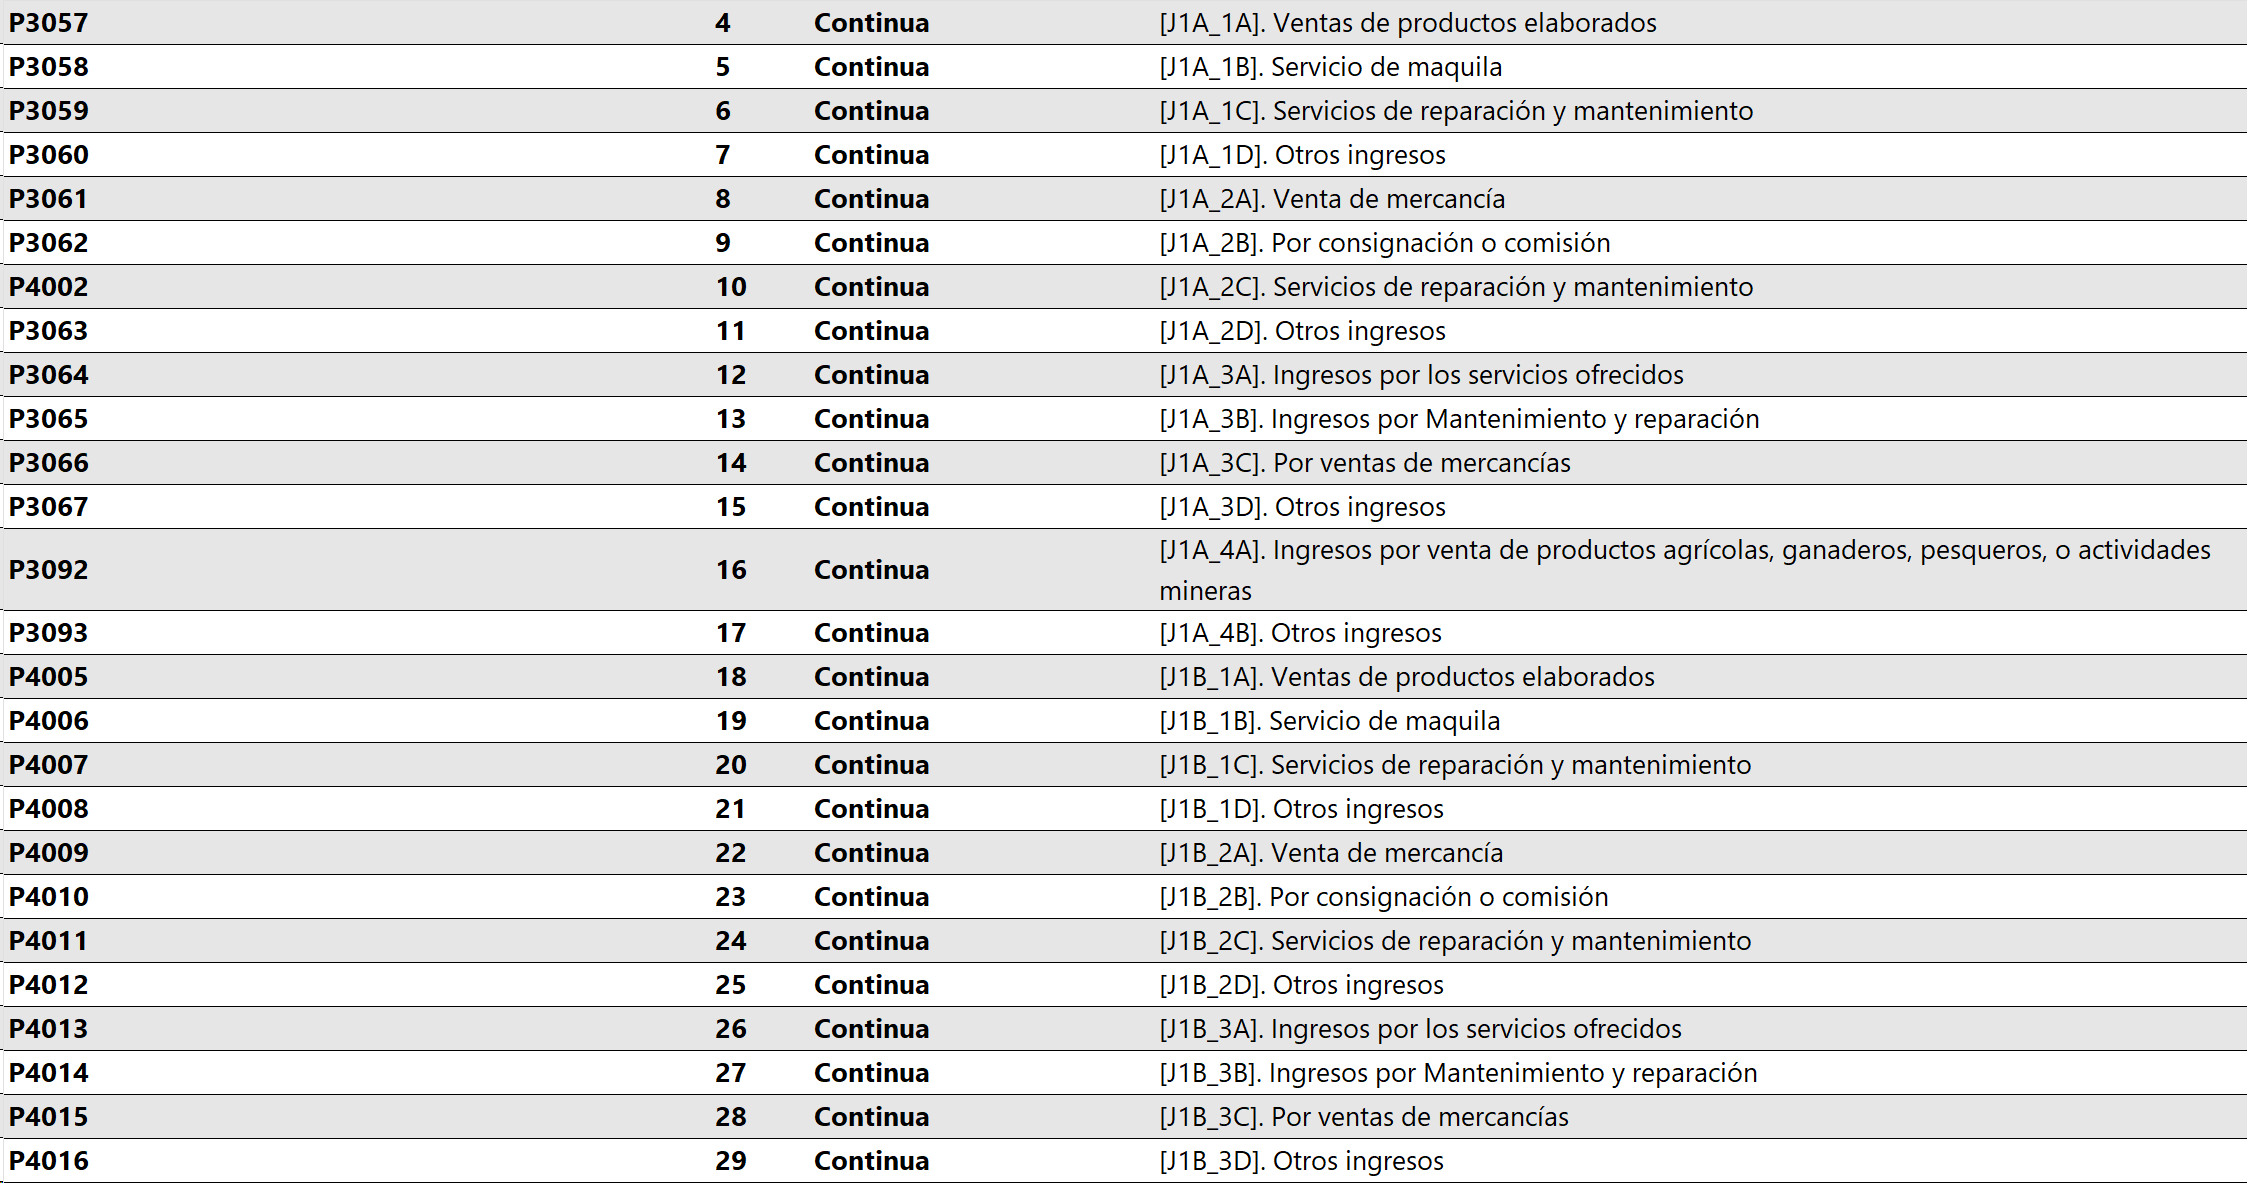

In [164]:
modulo_sales = pd.read_csv("../../../Data/Emicron-2022/Módulo de ventas o ingresos.csv")

In [165]:
emicron_nan = {}

In [166]:
emicron_nan = pd.merge(emicron_nat, modulo_sales, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

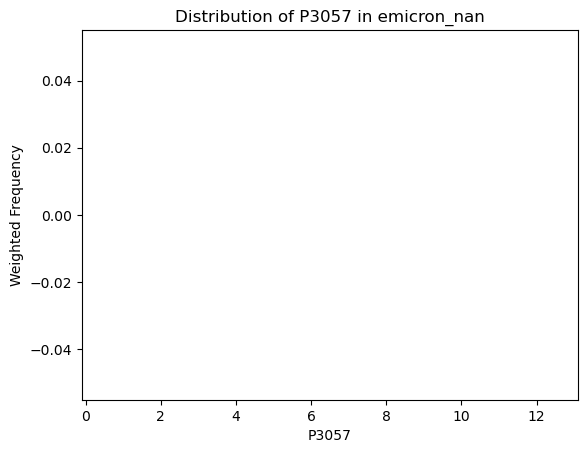

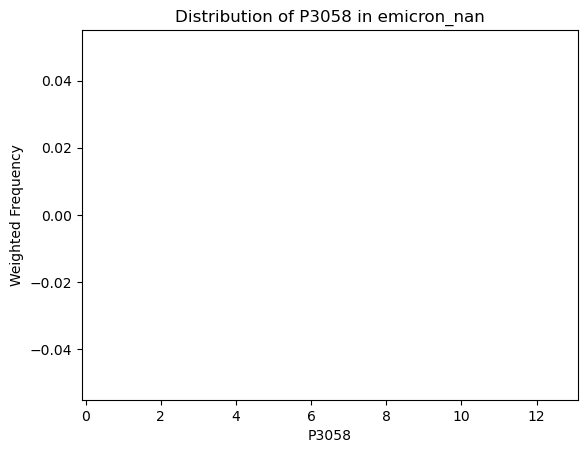

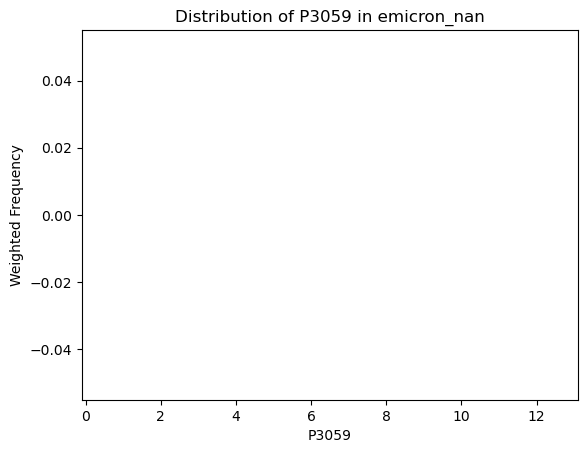

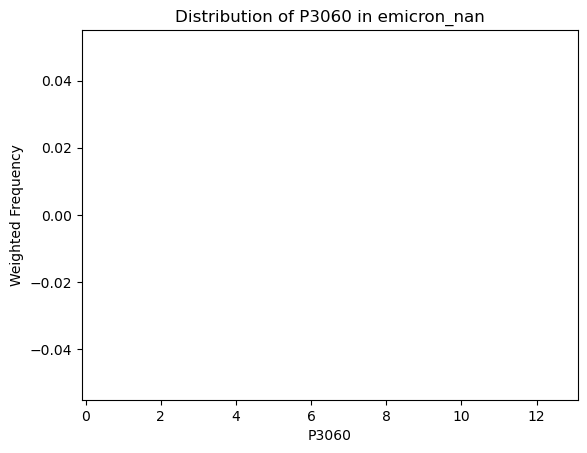

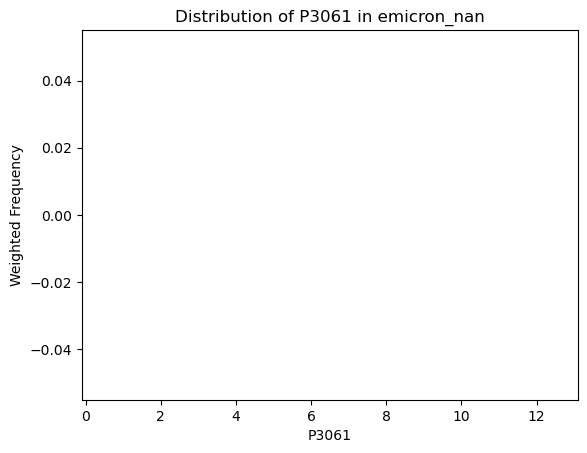

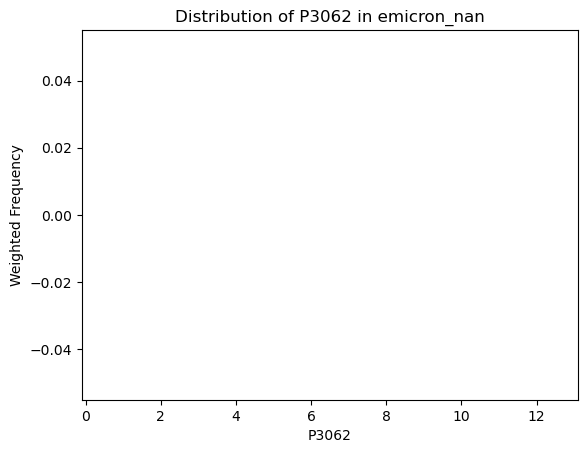

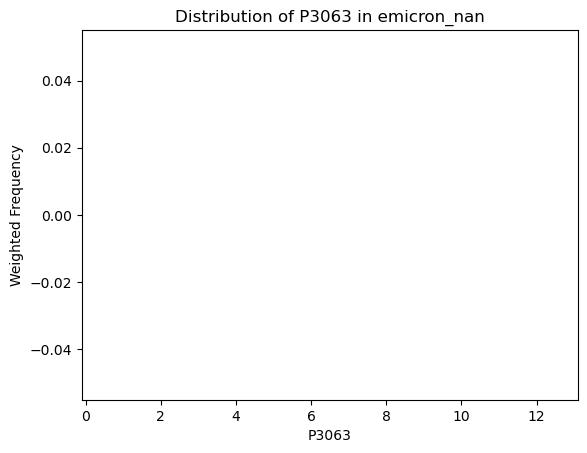

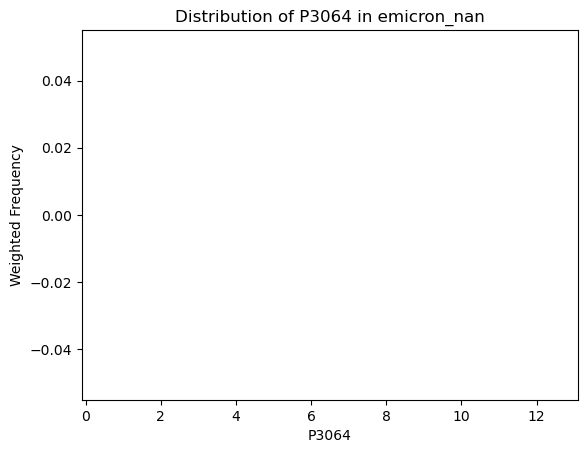

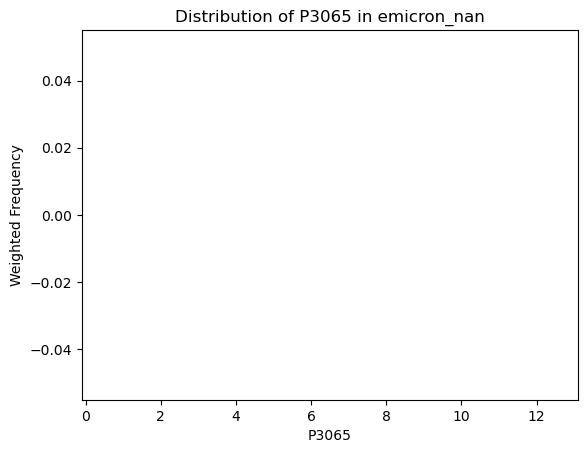

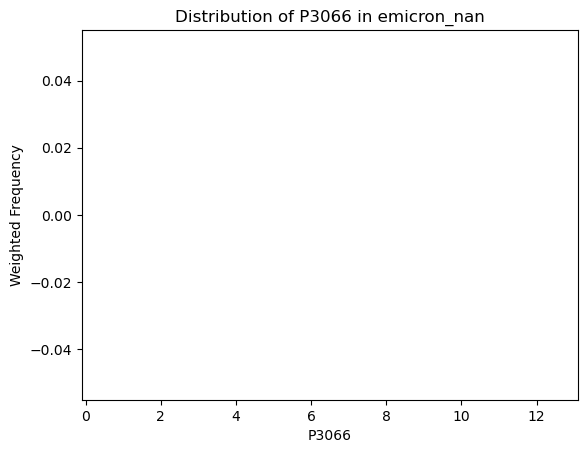

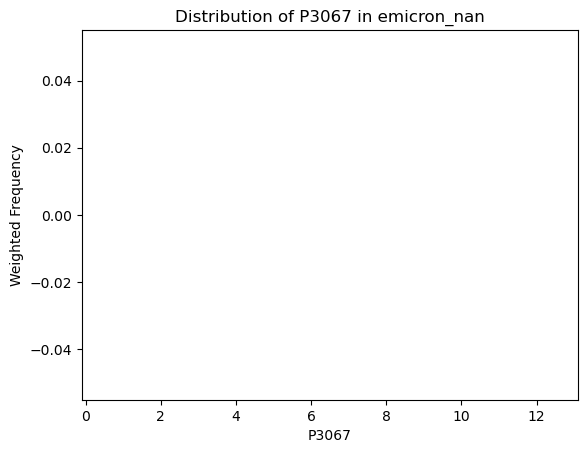

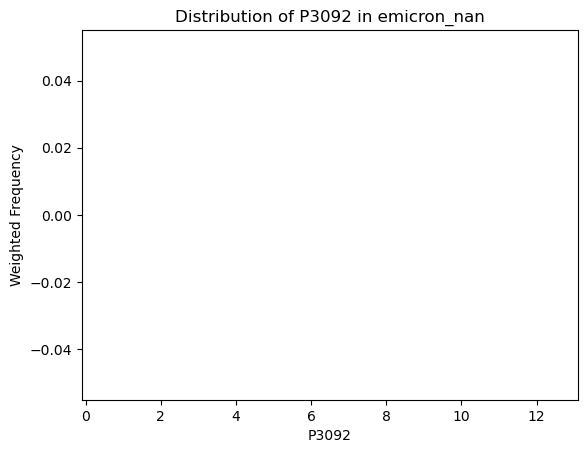

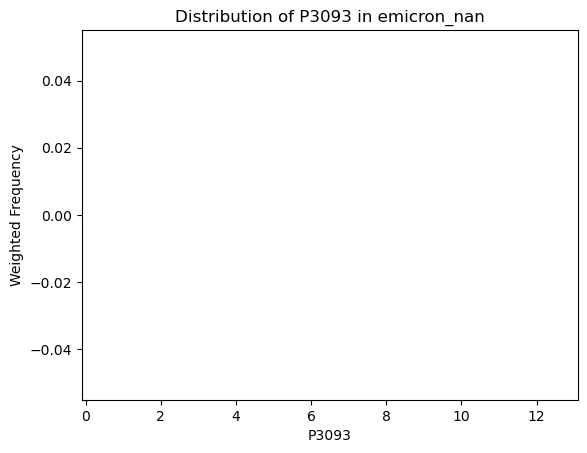

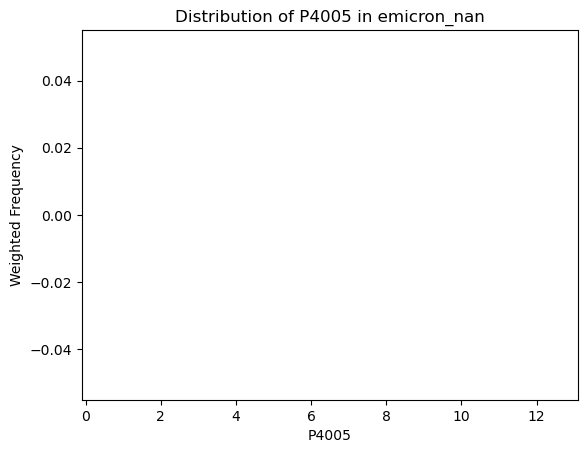

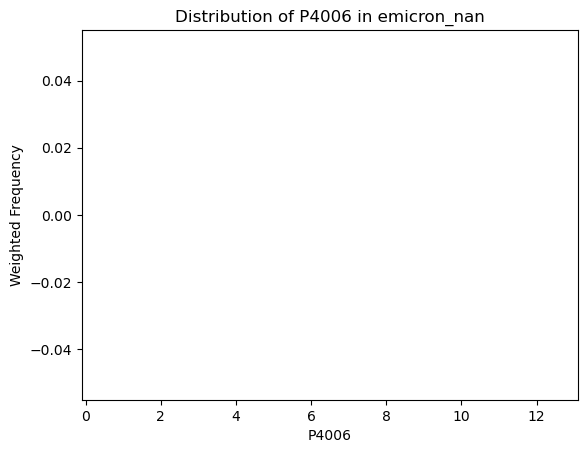

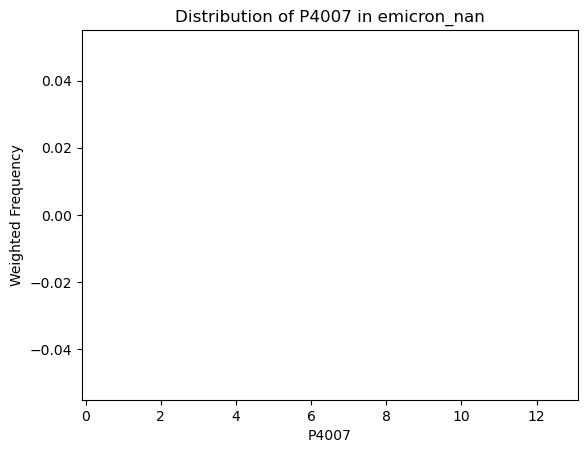

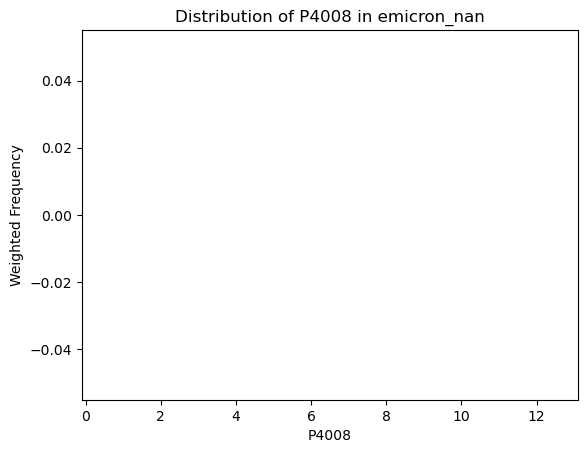

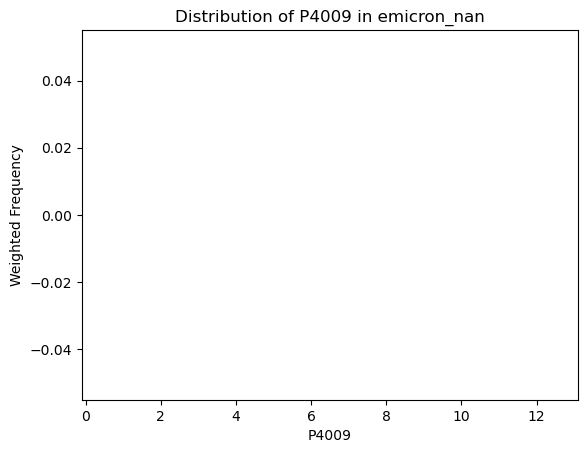

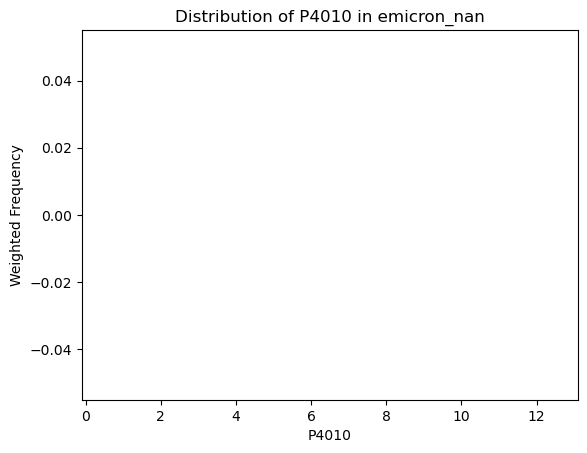

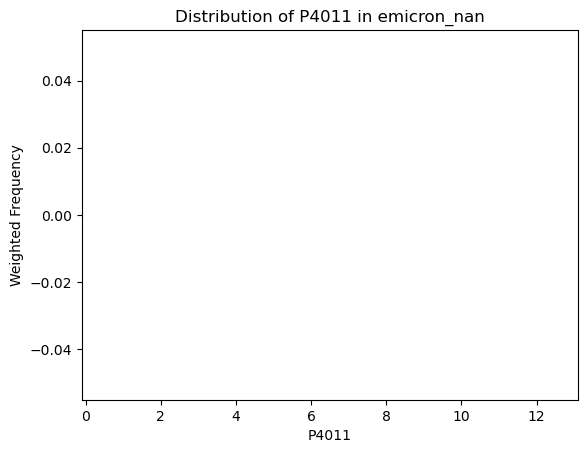

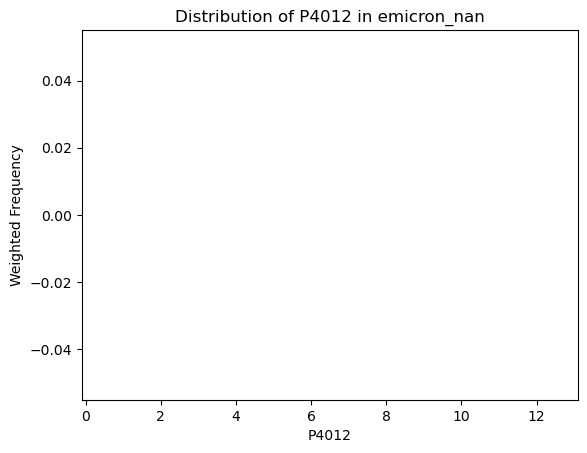

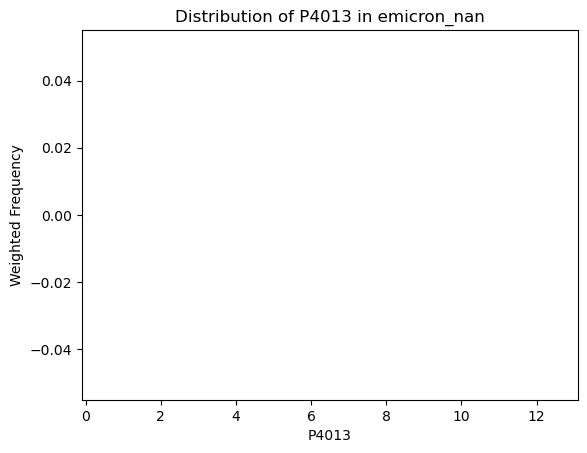

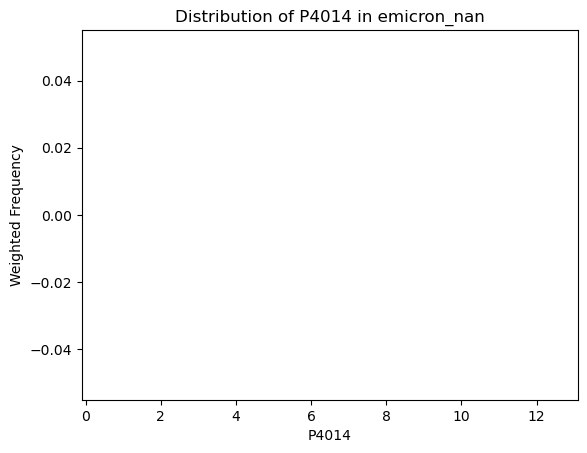

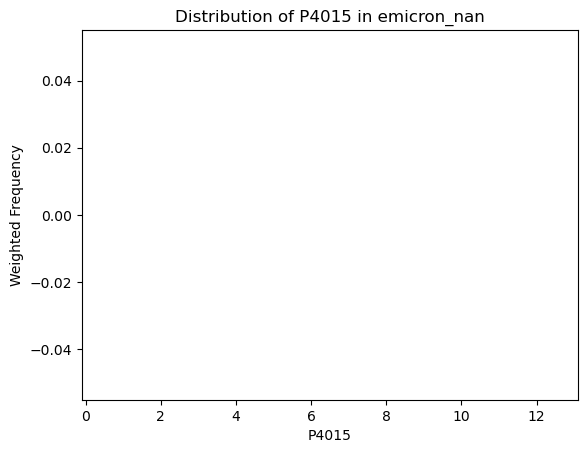

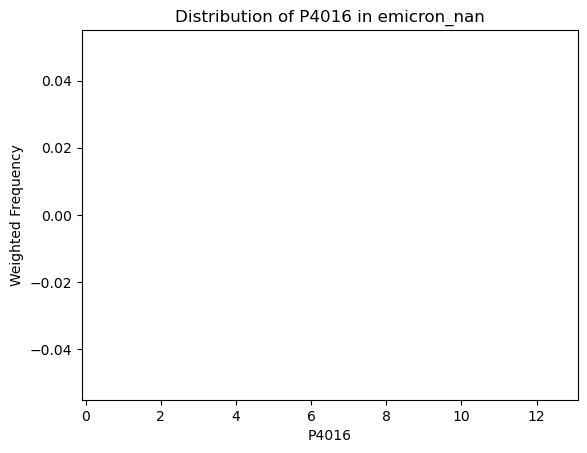

In [167]:
import matplotlib.pyplot as plt

columns = ['P3057', 'P3058', 'P3059', 'P3060', 'P3061', 'P3062', 'P3063', 'P3064', 'P3065', 'P3066', 'P3067', 'P3092', 'P3093', 'P4005', 'P4006', 'P4007', 'P4008', 'P4009', 'P4010', 'P4011', 'P4012', 'P4013', 'P4014', 'P4015', 'P4016']

for column in columns:
    plt.hist(emicron_nan[column], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')
    plt.xlabel(column)
    plt.ylabel('Weighted Frequency')
    plt.title(f'Distribution of {column} in emicron_nan')
    plt.show()

*MPI*

**saving emicron_native**

In [ ]:
emicron_nat.to_csv('../../../Outputs/emicron_natives.csv', index=False)